# Notes
- Look at relation between job_title and company size
- Classify salaries in range bins and try and predict job_title 

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as spy
import pygwalker as pyg
import seaborn as sns

salaries_file = './ds_salaries copy.csv'
df = pd.read_csv(salaries_file)

# non pandas way
# for line in fin:
#   print(line.split(",")) returns a list of each data point in line

In [27]:
def pie_chart(dataframe, column):
    freqs = dataframe[column].sort_values().value_counts().to_numpy()
    labels = dataframe[column].sort_values().value_counts().keys().to_numpy()

    plt.pie(freqs, labels=labels)
    plt.title(f'{column}')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77]),
 [Text(0, 0, 'AE'),
  Text(1, 0, 'AM'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AS'),
  Text(4, 0, 'AT'),
  Text(5, 0, 'AU'),
  Text(6, 0, 'BA'),
  Text(7, 0, 'BE'),
  Text(8, 0, 'BG'),
  Text(9, 0, 'BO'),
  Text(10, 0, 'BR'),
  Text(11, 0, 'CA'),
  Text(12, 0, 'CF'),
  Text(13, 0, 'CH'),
  Text(14, 0, 'CL'),
  Text(15, 0, 'CN'),
  Text(16, 0, 'CO'),
  Text(17, 0, 'CR'),
  Text(18, 0, 'CY'),
  Text(19, 0, 'CZ'),
  Text(20, 0, 'DE'),
  Text(21, 0, 'DK'),
  Text(22, 0, 'DO'),
  Text(23, 0, 'DZ'),
  Text(24, 0, 'EE'),
  Text(25, 0, 'EG'),
  Text(26, 0, 'ES'),
  Text(27, 0, 'FI'),
  Text(28, 0, 'FR'),
  Text(29, 0, 'GB'),
  Text(30, 0, 'GH'),
  Tex

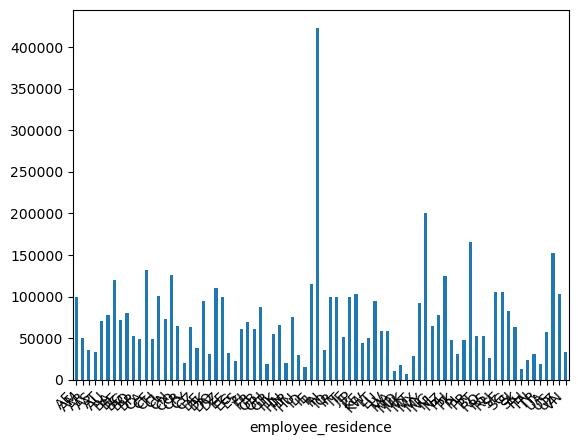

In [19]:
df.groupby( 'employee_residence')['salary_in_usd'].mean().plot.bar()
plt.xticks(rotation=45, ha='right')

In [20]:
df

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [18]:
df.head()

work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

In [19]:
df.tail()

work_year experience_level employment_type                 job_title  \
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L

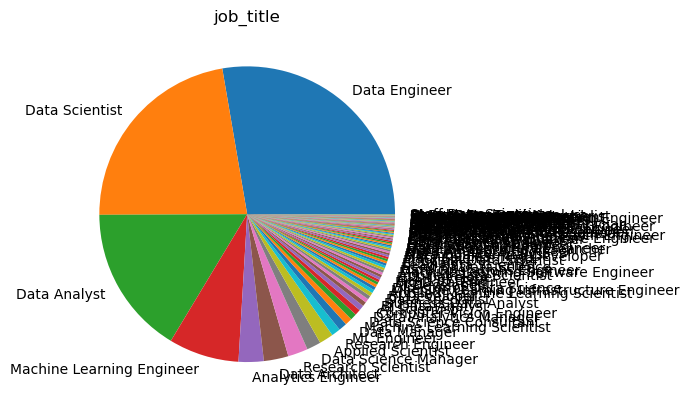

In [28]:
pie_chart(df, 'job_title')

In [4]:
with open('../../ds examination graphs/exp yr remote.json', 'r') as fin:
    spec = fin.read()
    print(spec)
pyg.walk(df, spec=spec)

[{"visId":"gw_XmIg","name":"Chart 1","encodings":{"dimensions":[{"dragId":"gw_EiJB","fid":"d29ya195ZWFyXzE=","name":"work_year","semanticType":"ordinal","analyticType":"dimension"},{"dragId":"gw_kDgx","fid":"ZXhwZXJpZW5jZV9sZXZlbF8y","name":"experience_level","semanticType":"nominal","analyticType":"dimension"},{"dragId":"gw_-ARa","fid":"ZW1wbG95bWVudF90eXBlXzM=","name":"employment_type","semanticType":"nominal","analyticType":"dimension"},{"dragId":"gw_qQLJ","fid":"am9iX3RpdGxlXzQ=","name":"job_title","semanticType":"nominal","analyticType":"dimension"},{"dragId":"gw_ELq9","fid":"c2FsYXJ5X2N1cnJlbmN5XzY=","name":"salary_currency","semanticType":"nominal","analyticType":"dimension"},{"dragId":"gw_WP-E","fid":"ZW1wbG95ZWVfcmVzaWRlbmNlXzg=","name":"employee_residence","semanticType":"nominal","analyticType":"dimension"},{"dragId":"gw_s8dt","fid":"cmVtb3RlX3JhdGlvXzk=","name":"remote_ratio","semanticType":"ordinal","analyticType":"dimension"},{"dragId":"gw_00c6","fid":"Y29tcGFueV9sb2NhdGl

In [23]:
USD_df = df.set_index(df.salary_currency).loc['USD']
USD_df.sort_values( 'work_year' )

work_year experience_level employment_type  \
salary_currency                                               
USD                   2020               EN              CT   
USD                   2020               MI              FT   
USD                   2020               MI              FT   
USD                   2020               MI              FT   
USD                   2020               MI              FT   
...                    ...              ...             ...   
USD                   2023               MI              FT   
USD                   2023               SE              FT   
USD                   2023               SE              FT   
USD                   2023               SE              FT   
USD                   2023               SE              FT   

                             job_title  salary salary_currency  salary_in_usd  \
salary_currency                                                                 
USD              Business Data Analyst  100000             USD         100000   
USD                 Lead Data Engineer   56000             USD          56000   
USD                       Data Analyst    8000             USD           8000   
USD                       Data Analyst   85000             USD          85000   
USD                  Lead Data Analyst   87000             USD          87000   
...                                ...     ...             ...            ...   
USD                      Data Engineer   90000             USD          90000   
USD                     Data Scientist  185900             USD         185900   
USD                     Data Scientist  129300             USD         129300   
USD                      Data Engineer  146000             USD         146000   
USD                     Data Scientist  182000             USD         182000   

                employee_residence  remote_ratio company_location company_size  
salary_currency                                                                 
USD                             US           100               US            L  
USD                             PT           100               US            M  
USD                             PK            50               PK            L  
USD                             US           100               US            L  
USD                             US           100               US            L  
...                            ...           ...              ...          ...  
USD                             US             0               US            M  
USD                             US             0               US            M  
USD                             US             0               US            M  
USD                             US           100               US            M  
USD                             US             0               US            M  

[3224 rows x 11 columns]

In [24]:
df.groupby("company_location").describe()

work_year                                                 \
                     count         mean       std     min     25%     50%   
company_location                                                            
AE                     3.0  2021.333333  1.154701  2020.0  2021.0  2022.0   
AL                     1.0  2022.000000       NaN  2022.0  2022.0  2022.0   
AM                     1.0  2023.000000       NaN  2023.0  2023.0  2023.0   
AR                     3.0  2022.000000  0.000000  2022.0  2022.0  2022.0   
AS                     3.0  2021.333333  0.577350  2021.0  2021.0  2021.0   
...                    ...          ...       ...     ...     ...     ...   
TH                     3.0  2022.333333  1.154701  2021.0  2022.0  2023.0   
TR                     5.0  2021.400000  0.547723  2021.0  2021.0  2021.0   
UA                     4.0  2022.500000  1.000000  2021.0  2022.5  2023.0   
US                  3040.0  2022.463158  0.612976  2020.0  2022.0  2023.0   
VN                     1.0  2023.000000       NaN  2023.0  2023.0  2023.0   

                                  salary                 ... salary_in_usd  \
                     75%     max   count           mean  ...           75%   
company_location                                         ...                 
AE                2022.0  2022.0     3.0  100000.000000  ...      117500.0   
AL                2022.0  2022.0     1.0   10000.000000  ...       10000.0   
AM                2023.0  2023.0     1.0   50000.000000  ...       50000.0   
AR                2022.0  2022.0     3.0   25000.000000  ...       31500.0   
AS                2021.5  2022.0     3.0  468333.333333  ...       35000.0   
...                  ...     ...     ...            ...  ...           ...   
TH                2023.0  2023.0     3.0  618333.333333  ...       27096.5   
TR                2022.0  2022.0     5.0  114600.000000  ...       25000.0   
UA                2023.0  2023.0     4.0   57850.000000  ...       72000.0   
US                2023.0  2023.0  3040.0  157665.357566  ...      185000.0   
VN                2023.0  2023.0     1.0   12000.000000  ...       12000.0   

                           remote_ratio                                       \
                       max        count        mean        std    min    25%   
company_location                                                               
AE                120000.0          3.0   66.666667  57.735027    0.0   50.0   
AL                 10000.0          1.0   50.000000        NaN   50.0   50.0   
AM                 50000.0          1.0    0.000000        NaN    0.0    0.0   
AR                 50000.0          3.0  100.000000   0.000000  100.0  100.0   
AS                 50000.0          3.0   66.666667  57.735027    0.0   50.0   
...                    ...          ...         ...        ...    ...    ...   
TH                 29453.0          3.0   66.666667  28.867513   50.0   50.0   
TR                 28016.0          5.0   40.000000  41.833001    0.0    0.0   
UA                108000.0          4.0   37.500000  47.871355    0.0    0.0   
US                450000.0       3040.0   44.440789  49.366001    0.0    0.0   
VN                 12000.0          1.0    0.000000        NaN    0.0    0.0   

                                       
                    50%    75%    max  
company_location                       
AE                100.0  100.0  100.0  
AL                 50.0   50.0   50.0  
AM                  0.0    0.0    0.0  
AR                100.0  100.0  100.0  
AS                100.0  100.0  100.0  
...                 ...    ...    ...  
TH                 50.0   75.0  100.0  
TR                 50.0   50.0  100.0  
UA                 25.0   62.5  100.0  
US                  0.0  100.0  100.0  
VN                  0.0    0.0    0.0  

[72 rows x 32 columns]

US Only

In [29]:
useless_cols = [
    'employee_residence', 'company_location', 'salary_currency', 'salary_in_usd'
]
only_us_df = df.loc[(df.employee_residence == 'US') & (df.company_location == 'US') ].drop(useless_cols, axis=1)

In [30]:
only_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 1 to 3753
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         2999 non-null   int64 
 1   experience_level  2999 non-null   object
 2   employment_type   2999 non-null   object
 3   job_title         2999 non-null   object
 4   salary            2999 non-null   int64 
 5   remote_ratio      2999 non-null   int64 
 6   company_size      2999 non-null   object
dtypes: int64(3), object(4)
memory usage: 187.4+ KB


In [31]:
only_us_df.head()

work_year experience_level employment_type          job_title  salary  \
1       2023               MI              CT        ML Engineer   30000   
2       2023               MI              CT        ML Engineer   25500   
5       2023               SE              FT  Applied Scientist  222200   
6       2023               SE              FT  Applied Scientist  136000   
9       2023               SE              FT     Data Scientist  147100   

   remote_ratio company_size  
1           100            S  
2           100            S  
5             0            L  
6             0            L  
9             0            M

In [32]:
only_us_df.tail()

work_year experience_level employment_type                 job_title  \
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary  remote_ratio company_size  
3749  165000           100            L  
3750  412000           100            L  
3751  151000           100            L  
3752  105000           100            S  
3753  100000           100            L

In [33]:
only_us_df.describe()

work_year         salary  remote_ratio
count  2999.000000    2999.000000   2999.000000
mean   2022.475825  152860.727909     43.847949
std       0.599087   55325.136882     49.341882
min    2020.000000   24000.000000      0.000000
25%    2022.000000  115000.000000      0.000000
50%    2023.000000  145000.000000      0.000000
75%    2023.000000  185000.000000    100.000000
max    2023.000000  450000.000000    100.000000

# Examining the Relationship between Remote Ratio and Salary in USD

<AxesSubplot: ylabel='Frequency'>

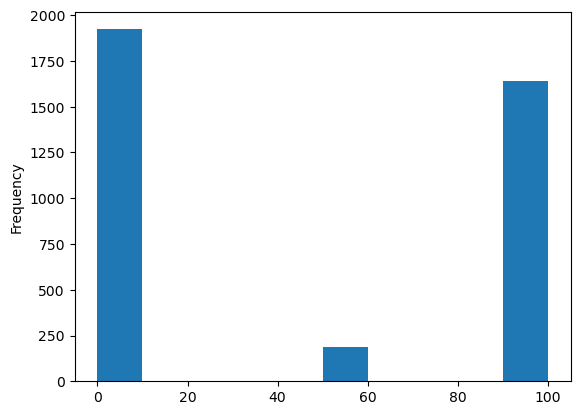

In [25]:
df.remote_ratio.plot.hist()

<AxesSubplot: >

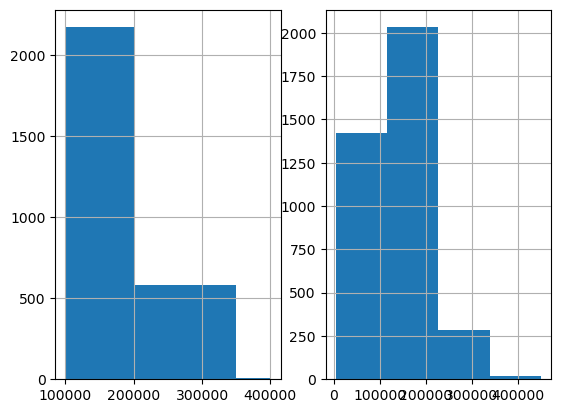

In [26]:
plt.subplot(121)
df.salary_in_usd.hist(bins=[100e3,200e3,350e3 ,400e3])
plt.subplot(122)
df.salary_in_usd.hist(bins=4)

In [27]:
df

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [28]:
df.sort_values(['remote_ratio', 'salary_in_usd'], inplace=True)
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [29]:
indexed_df = df.set_index(['remote_ratio'])
remote_salary_df = indexed_df[['salary_in_usd']]

In [30]:
rr0 = indexed_df.loc[0]
rr50 = indexed_df.loc[50]
rr100 = indexed_df.loc[100]

In [31]:
rr0.reset_index(inplace=True)
rr50.reset_index(inplace=True)
rr100.reset_index(inplace=True)

Distribution of salaries among remote_ratio groups

<AxesSubplot: title={'center': '100 Remote_Ratio'}>

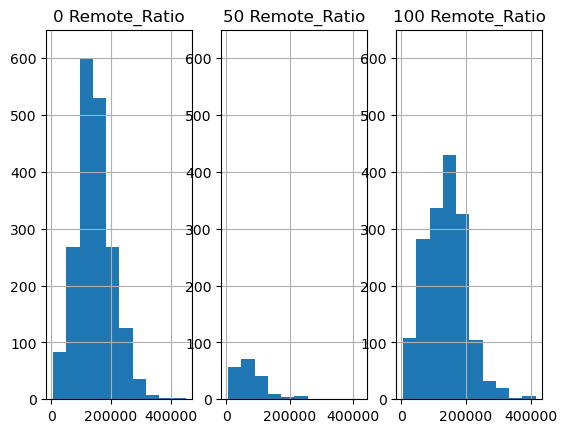

In [32]:
plt.subplot(131)
plt.ylim(top=650)
plt.title('0 Remote_Ratio')

rr0['salary_in_usd'].hist()

plt.subplot(132)
plt.title('50 Remote_Ratio')
plt.ylim(top=650)

rr50['salary_in_usd'].hist()

plt.subplot(133)
plt.ylim(top=650)
plt.title('100 Remote_Ratio')

rr100['salary_in_usd'].hist()

<AxesSubplot: >

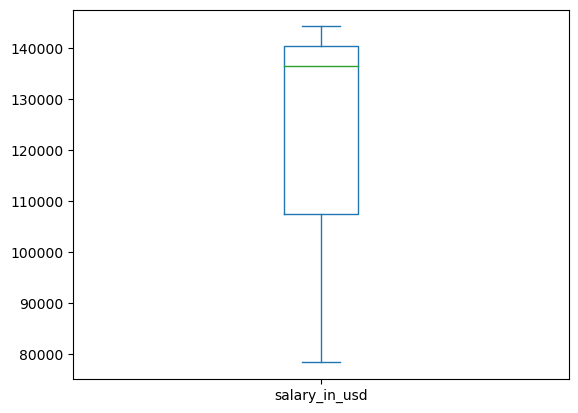

In [33]:
df.groupby(['remote_ratio'])['salary_in_usd'].mean().plot.box()

Mean of salaries in each remote_ratio group

<AxesSubplot: xlabel='remote_ratio'>

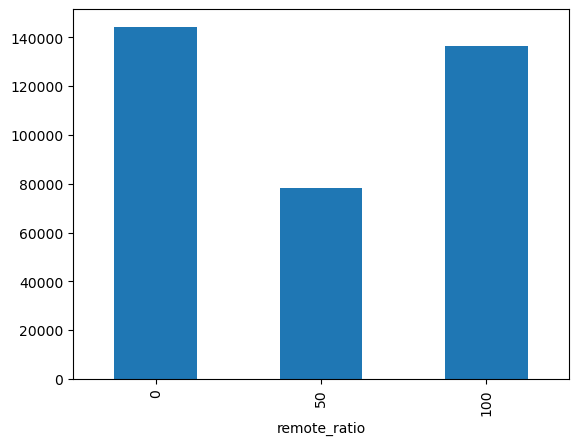

In [34]:
df.groupby(['remote_ratio'])['salary_in_usd'].mean().plot.bar()

In [35]:
rr0['salary_in_usd'].describe(), rr50['salary_in_usd'].describe(), rr100['salary_in_usd'].describe()

(count      1923.000000
 mean     144316.202288
 std       59799.970864
 min        5882.000000
 25%      105200.000000
 50%      139600.000000
 75%      179820.000000
 max      450000.000000
 Name: salary_in_usd, dtype: float64,
 count       189.000000
 mean      78400.687831
 std       61326.133522
 min        5409.000000
 25%       40570.000000
 50%       63312.000000
 75%      100000.000000
 max      423000.000000
 Name: salary_in_usd, dtype: float64,
 count      1643.000000
 mean     136481.452830
 std       63373.507699
 min        5132.000000
 25%       90000.000000
 50%      135000.000000
 75%      180000.000000
 max      416000.000000
 Name: salary_in_usd, dtype: float64)

let's use Panda's GroupBy

In [36]:
remote_grps = df.groupby('remote_ratio')
remote_grps['salary_in_usd'].describe()

count           mean           std     min       25%       50%  \
remote_ratio                                                                    
0             1923.0  144316.202288  59799.970864  5882.0  105200.0  139600.0   
50             189.0   78400.687831  61326.133522  5409.0   40570.0   63312.0   
100           1643.0  136481.452830  63373.507699  5132.0   90000.0  135000.0   

                   75%       max  
remote_ratio                      
0             179820.0  450000.0  
50            100000.0  423000.0  
100           180000.0  416000.0

That's alot easier than my diy method

# Examining How Salaries Change Over The Years

In [37]:
wkyrs = df
wkyrs.dropna(inplace=True)
# wkyrs.sort_values('work_year')
wkyrs.groupby('work_year')
yrgrps = wkyrs.groupby('work_year')
yrgrps['salary_in_usd'].describe()

count           mean           std     min        25%       50%  \
work_year                                                                     
2020         76.0   92302.631579  82370.048002  5707.0   42147.75   73065.0   
2021        230.0   94087.208696  68600.465120  5409.0   46650.00   80000.0   
2022       1664.0  133338.620793  58947.155520  5132.0   94545.00  131300.0   
2023       1785.0  149045.541176  61307.711442  7000.0  107000.00  143860.0   

                 75%       max  
work_year                       
2020       114285.25  450000.0  
2021       129305.25  423000.0  
2022       172050.00  430967.0  
2023       184000.00  423834.0

In [38]:
yrgrps.mean()

/tmp/ipykernel_1400/3401954873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yrgrps.mean()


salary  salary_in_usd  remote_ratio
work_year                                            
2020       386352.750000   92302.631579     65.131579
2021       544163.252174   94087.208696     68.695652
2022       165421.016827  133338.620793     55.408654
2023       160381.480672  149045.541176     34.061625

/tmp/ipykernel_1400/3314352165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yrgrps.mean()['salary_in_usd'].plot()


Text(0, 0.5, 'salary (USD)')

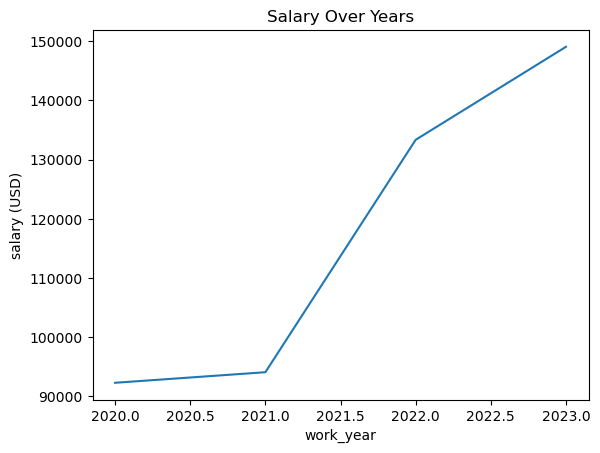

In [39]:
yrgrps.mean()['salary_in_usd'].plot()
plt.title("Salary Over Years")
plt.ylabel('salary (USD)')

## Look Only At USA

In [40]:
employee_res_grps = df['salary_in_usd'].groupby(df['employee_residence'])
# employee_res_grps = df.groupby('employee_residence')
# employee_res_grps.loc['US']
employee_res_grps.groups

{'AE': [3607, 3409, 3408], 'AM': [1485], 'AR': [2034, 2121, 1463, 3066, 3033, 3225], 'AS': [2149, 2335], 'AT': [3459, 3730, 3062, 3524, 2416, 604], 'AU': [2654, 2699, 2698, 2579, 3448, 1849, 2940, 218, 3442, 3142, 3477], 'BA': [1528], 'BE': [3074, 3505, 2128, 3034, 3684], 'BG': [3547], 'BO': [2933, 2932, 3427], 'BR': [3703, 3723, 2975, 2840, 972, 3735, 1166, 3484, 2554, 2548, 2560, 2568, 2547, 2553, 2559, 2567, 3451, 3584], 'CA': [322, 3369, 2274, 3368, 30, 3339, 3338, 29, 2273, 1793, 2705, 1779, 1792, 2161, 2704, 8, 1778, 1332, 214, 2160, 462, 626, 7, 213, 1331, 461, 625, 323, 2022, 3429, 3653, 3601, 2172, 3419, 1339, 2665, 3525, 2651, 3420, 2033, 3438, 327, 3289, 3291, 3608, 3433, 3645, 2571, 3454, 3528, 3418, 3452, 3714, 3287, 1475, 448, 804, 3479, 3604, 780, 447, 3183, 2474, 4, 803, 3288, 3290, 339, 2957, 576, 1474, 1088, 575, 2148, 3, 338, 1864, 2956, 2473, 3570, 3286, 2147, 1863, 779, 1087], 'CF': [176, 175], 'CH': [3469, 591, 114, 2379], 'CL': [3669, 2747], 'CN': [2501], 'CO': [

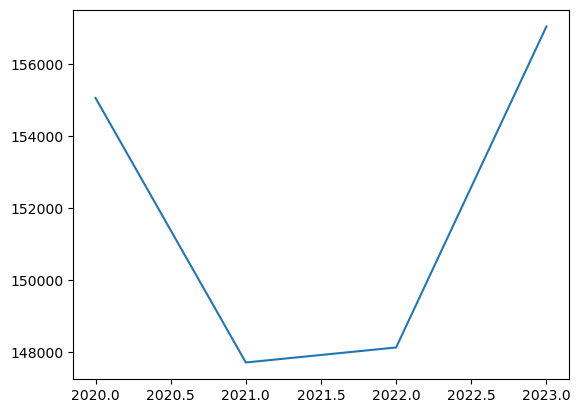

In [41]:
wkyr_usa = df.set_index('employee_residence').loc["US"][[ 'salary_in_usd', 'work_year' ]].groupby('work_year')
plt.plot((2020,2021,2022,2023) , wkyr_usa.describe()['salary_in_usd']['mean'] )

A downward trend during COVID, but a higher upward trend after 2022

## Sub-analyzing at salaries over time for each remote_ratio

In [42]:

USD_df.groupby([ 'remote_ratio', 'work_year'])['salary'].describe()

count           mean            std      min  \
remote_ratio work_year                                                  
0            2020          7.0  150428.571429  155014.899438  15000.0   
             2021         22.0  119178.409091   75621.464221  18000.0   
             2022        614.0  144369.464169   50242.869139  10000.0   
             2023       1087.0  157417.540938   56003.204977   7000.0   
50           2020          6.0  115833.333333   85262.926684   8000.0   
             2021         21.0  117447.523810   95529.822708  12000.0   
             2022         25.0  109196.160000   89379.895961   7500.0   
             2023         14.0  100642.857143   59939.209131  30000.0   
100          2020         25.0  126844.400000   85702.449113  10000.0   
             2021         79.0  126823.696203   71117.260196   9272.0   
             2022        779.0  146321.921694   55031.618192   8000.0   
             2023        545.0  153491.748624   60179.936676  25500.0   

                             25%       50%       75%       max  
remote_ratio work_year                                          
0            2020        57500.0   98000.0  187500.0  450000.0  
             2021        73500.0  105000.0  161250.0  276000.0  
             2022       110000.0  139300.0  175000.0  345600.0  
             2023       120000.0  148700.0  185900.0  385000.0  
50           2020        61500.0  122500.0  143750.0  250000.0  
             2021        58000.0  100000.0  147000.0  423000.0  
             2022        50000.0  100000.0  145000.0  375000.0  
             2023        50000.0  100000.0  117500.0  220000.0  
100          2020        85000.0  105000.0  138000.0  412000.0  
             2021        80000.0  120000.0  170000.0  416000.0  
             2022       110925.0  141525.0  184000.0  405000.0  
             2023       110000.0  149040.0  186000.0  376080.0

In [119]:
four_cat_color = ['r']*4+['b']*4+['g']*4
USD_df.groupby([ 'remote_ratio', 'work_year'])['salary'].mean().plot.bar(color=['r']*4+['b']*4+['g']*4)

NameError: name 'USD_df' is not defined

ANOVA amongst each year of each remote_ratio

In [103]:
US_df.groupby([ 'remote_ratio', 'work_year'])['salary'].describe()

count          mean           std       min  \
remote_ratio work_year                                                 
0            2020          3.0  2.143333e+05  2.040988e+05   95000.0   
             2021         17.0  1.307603e+05  7.718008e+04   20000.0   
             2022        598.0  1.456185e+05  4.918019e+04   24000.0   
             2023       1051.0  1.576219e+05  5.522374e+04   48000.0   
50           2020          3.0  1.733333e+05  6.806859e+04  120000.0   
             2021         14.0  1.202357e+06  3.001960e+06   55000.0   
             2022         16.0  1.235878e+05  8.147034e+04   20000.0   
             2023          7.0  1.341429e+05  6.357523e+04   50000.0   
100          2020         25.0  1.288444e+05  8.341498e+04   45760.0   
             2021         69.0  1.416145e+05  7.390347e+04   12000.0   
             2022        725.0  1.529401e+05  1.017587e+05   12000.0   
             2023        512.0  1.553766e+05  6.002982e+04   25500.0   

                             25%       50%       75%         max  
remote_ratio work_year                                            
0            2020        96500.0   98000.0  274000.0    450000.0  
             2021        75000.0  111775.0  165000.0    276000.0  
             2022       110000.0  140000.0  175000.0    345600.0  
             2023       120000.0  148700.0  185900.0    385000.0  
50           2020       135000.0  150000.0  200000.0    250000.0  
             2021       110500.0  138500.0  233750.0  11000000.0  
             2022        69500.0  120202.0  147000.0    375000.0  
             2023       102500.0  110000.0  177000.0    220000.0  
100          2020        85000.0  105000.0  138000.0    412000.0  
             2021        90000.0  140000.0  174000.0    420000.0  
             2022       115934.0  144854.0  185000.0   2500000.0  
             2023       111625.0  150000.0  188800.0    376080.0

3042    US
3043    US
1111    US
1280    US
1967    US
        ..
649     US
3468    US
3463    US
3750    US
3675    US
Name: company_location, Length: 3004, dtype: object

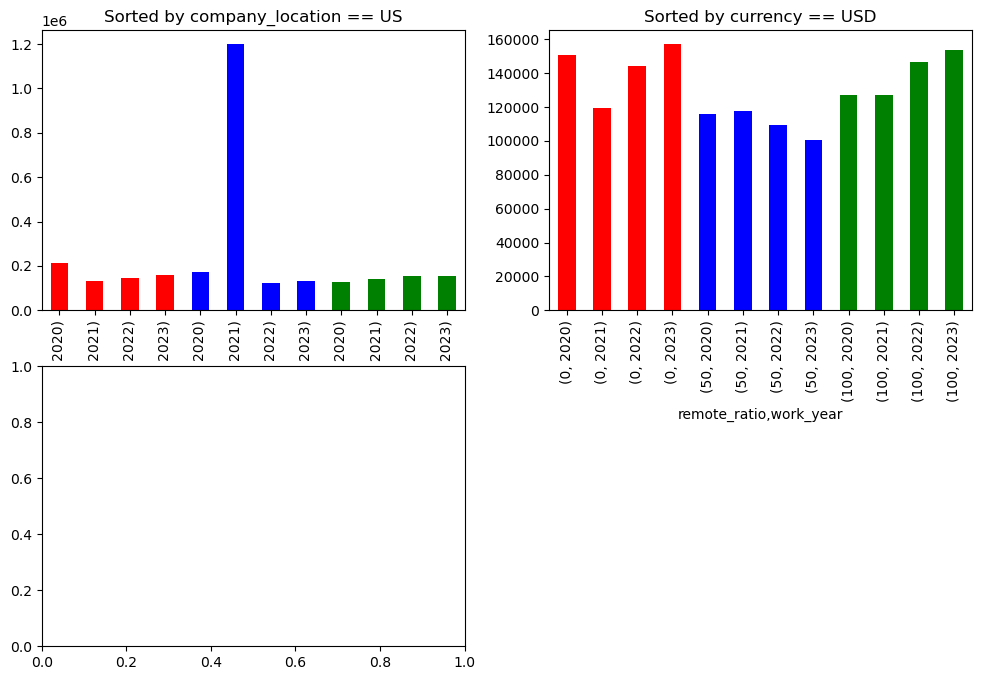

In [131]:
plt.subplot(221)
plt.title("Sorted by company_location == US")
US_df.groupby([ 'remote_ratio', 'work_year'])['salary'].mean().plot.bar(color=four_cat_color, figsize=(12,8))

plt.subplot(222)
plt.title("Sorted by currency == USD")
USD_df.groupby([ 'remote_ratio', 'work_year'])['salary'].mean().plot.bar(color=four_cat_color)

plt.subplot(223)


### US employees at US companies

In [8]:
useless_cols = [
    'employee_residence', 'company_location', 'salary_currency', 'salary_in_usd'
]
only_us_df = df.loc[(df.employee_residence == 'US') & (df.company_location == 'US') ].drop(useless_cols, axis=1)
only_us_df

work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary  remote_ratio company_size  
1      30000           100            S  
2      25500           100            S  
5     222200             0            L  
6     136000             0            L  
9     147100             0            M  
...      ...           ...          ...  
3749  165000           100            L  
3750  412000           100            L  
3751  151000           100            L  
3752  105000           100            S  
3753  100000           100            L  

[2999 rows x 7 columns]

In [13]:
us_salaries = only_us_df.salary
print( us_salaries )

1        30000
2        25500
5       222200
6       136000
9       147100
         ...  
3749    165000
3750    412000
3751    151000
3752    105000
3753    100000
Name: salary, Length: 2999, dtype: int64


In [34]:
only_us_df.set_index('work_year').loc[2023].salary

work_year
2023     30000
2023     25500
2023    222200
2023    136000
2023    147100
         ...  
2023    134500
2023    130000
2023     90000
2023    160000
2023    135000
Name: salary, Length: 1565, dtype: int64

In [37]:
salaries_2023 = only_us_df.set_index('work_year').loc[2023].salary
salaries_2021 = only_us_df.set_index('work_year').loc[2021].salary
salaries_2020 = only_us_df.set_index('work_year').loc[2020].salary
# salaries_2022 = us_salaries[only_us_df.set_index('work_year').loc[2022].index] no 2022 data

In [38]:
print( salaries_2021)

work_year
2021    150000
2021    115000
2021    250000
2021    109000
2021    150000
         ...  
2021     62000
2021     73000
2021    423000
2021    165000
2021    151000
Name: salary, Length: 86, dtype: int64


In [57]:
print(f'between 2020 and 2023\npvalue = {  spy.stats.f_oneway(salaries_2020, salaries_2023)[1]    }')
print('\n')
print(f'between 2020 and 2021\npvalue = {  spy.stats.f_oneway(salaries_2020, salaries_2021)[1]    }')
print('\n')
print(f'between 2021 and 2023\npvalue = {  spy.stats.f_oneway(salaries_2020, salaries_2023)[1]    }')

between 2020 and 2023
pvalue = 0.861862775387888


between 2020 and 2021
pvalue = 0.6334784658534816


between 2021 and 2023
pvalue = 0.861862775387888


In [66]:
only_us_df.set_index([ 'work_year' , 'remote_ratio']).loc[2023].loc[100].salary

remote_ratio
100     30000
100     25500
100    130000
100    100000
100    150000
        ...  
100    110000
100    160000
100     75000
100    236000
100    182000
Name: salary, Length: 508, dtype: int64

<AxesSubplot: xlabel='remote_ratio,work_year'>

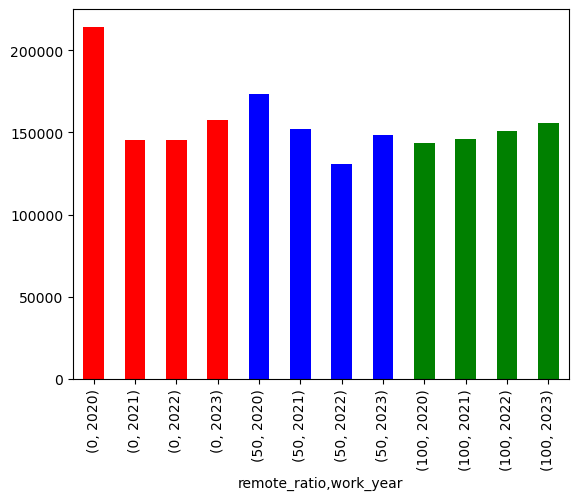

In [125]:
remote_grpby =  only_us_df.groupby([  'remote_ratio', 'work_year' ])
remote_grpby.salary.mean().plot.bar(color=['r']*4+['b']*4+['g']*4+['#a98d10']*4)

In [92]:
np.all( only_us_df.loc[(only_us_df.remote_ratio == 0)].salary == only_us_df.salary[remote_groups[0]] )

True

<AxesSubplot: xlabel='remote_ratio'>

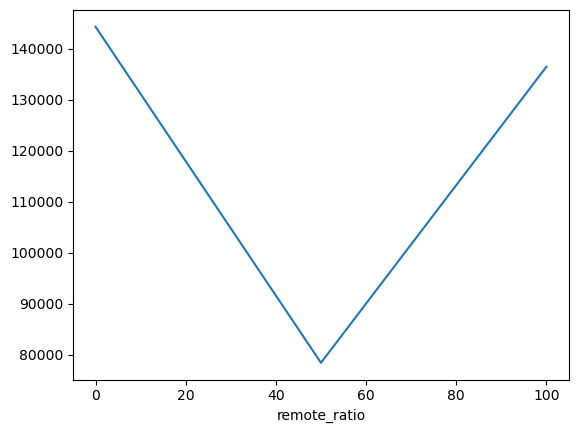

In [44]:
remote_grps['salary_in_usd'].describe()['mean'].plot()

## Examining Salary Trends In Careers

In [45]:
job_workyear_df = df.set_index(['job_title', 'work_year']).sort_index()
job_workyear_grps = job_workyear_df.groupby('job_title')
print('Salaries in Careers')
job_workyear_grps['salary_in_usd'].describe()

Salaries in Careers


count           mean            std       min  \
job_title                                                                      
3D Computer Vision Researcher    4.0   21352.250000   20046.470685    5409.0   
AI Developer                    11.0  136666.090909   95973.553918    6304.0   
AI Programmer                    2.0   55000.000000   21213.203436   40000.0   
AI Scientist                    16.0  110120.875000  111733.541359   12000.0   
Analytics Engineer             103.0  152368.631068   53838.467623    7500.0   
...                              ...            ...            ...       ...   
Research Engineer               37.0  163108.378378   55055.424934   60000.0   
Research Scientist              82.0  161214.195122   74944.431627   23000.0   
Software Data Engineer           2.0   62510.000000   17691.811665   50000.0   
Staff Data Analyst               1.0   15000.000000            NaN   15000.0   
Staff Data Scientist             1.0  105000.000000            NaN  105000.0   

                                     25%       50%       75%       max  
job_title                                                               
3D Computer Vision Researcher    8852.25   15000.0   27500.0   50000.0  
AI Developer                    69702.50  108000.0  207309.0  300000.0  
AI Programmer                   47500.00   55000.0   62500.0   70000.0  
AI Scientist                    31140.00   52500.0  200000.0  423834.0  
Analytics Engineer             116775.00  143860.0  185200.0  289800.0  
...                                  ...       ...       ...       ...  
Research Engineer              120000.00  155000.0  200000.0  293000.0  
Research Scientist             104579.00  150000.0  200000.0  450000.0  
Software Data Engineer          56255.00   62510.0   68765.0   75020.0  
Staff Data Analyst              15000.00   15000.0   15000.0   15000.0  
Staff Data Scientist           105000.00  105000.0  105000.0  105000.0  

[93 rows x 8 columns]

In [46]:
print('Remote ratios in Careers')
job_workyear_grps['remote_ratio'].describe()

Remote ratios in Careers


count        mean        std    min    25%  \
job_title                                                                   
3D Computer Vision Researcher    4.0   50.000000  40.824829    0.0   37.5   
AI Developer                    11.0   31.818182  40.451992    0.0    0.0   
AI Programmer                    2.0   50.000000  70.710678    0.0   25.0   
AI Scientist                    16.0   71.875000  40.697051    0.0   50.0   
Analytics Engineer             103.0   54.368932  49.560221    0.0    0.0   
...                              ...         ...        ...    ...    ...   
Research Engineer               37.0   18.918919  39.706128    0.0    0.0   
Research Scientist              82.0   27.439024  40.939913    0.0    0.0   
Software Data Engineer           2.0   75.000000  35.355339   50.0   62.5   
Staff Data Analyst               1.0    0.000000        NaN    0.0    0.0   
Staff Data Scientist             1.0  100.000000        NaN  100.0  100.0   

                                 50%    75%    max  
job_title                                           
3D Computer Vision Researcher   50.0   62.5  100.0  
AI Developer                     0.0   50.0  100.0  
AI Programmer                   50.0   75.0  100.0  
AI Scientist                   100.0  100.0  100.0  
Analytics Engineer             100.0  100.0  100.0  
...                              ...    ...    ...  
Research Engineer                0.0    0.0  100.0  
Research Scientist               0.0   50.0  100.0  
Software Data Engineer          75.0   87.5  100.0  
Staff Data Analyst               0.0    0.0    0.0  
Staff Data Scientist           100.0  100.0  100.0  

[93 rows x 8 columns]

# Examine salaries in experience level

Distribution of all experience levels

Text(0.5, 1.0, 'Experience Level')

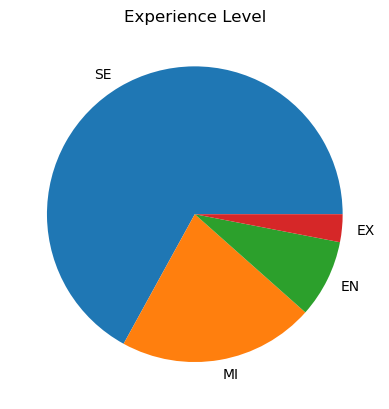

In [ ]:
exp_freqs = df.experience_level.value_counts().to_numpy()
exp_labels = df.experience_level.unique()
plt.pie(exp_freqs, labels=exp_labels)
plt.title('Experience Level')

In [47]:
df.set_index(['experience_level', 'salary_in_usd']).groupby('experience_level').describe()

work_year                                                 \
                     count         mean       std     min     25%     50%   
experience_level                                                            
EN                   320.0  2022.053125  0.909885  2020.0  2022.0  2022.0   
EX                   114.0  2022.385965  0.758536  2020.0  2022.0  2023.0   
MI                   805.0  2022.203727  0.793779  2020.0  2022.0  2022.0   
SE                  2516.0  2022.468203  0.591677  2020.0  2022.0  2023.0   

                                  salary                 ...            \
                     75%     max   count           mean  ...       75%   
experience_level                                         ...             
EN                2023.0  2023.0   320.0  188381.178125  ...  130000.0   
EX                2023.0  2023.0   114.0  246802.201754  ...  239000.0   
MI                2023.0  2023.0   805.0  248200.306832  ...  148500.0   
SE                2023.0  2023.0  2516.0  170048.965421  ...  186000.0   

                             remote_ratio                                  \
                         max        count       mean        std  min  25%   
experience_level                                                            
EN                 6600000.0        320.0  55.156250  44.404531  0.0  0.0   
EX                 6000000.0        114.0  48.245614  48.849518  0.0  0.0   
MI                30400000.0        805.0  46.211180  47.525119  0.0  0.0   
SE                 7500000.0       2516.0  45.071542  49.325015  0.0  0.0   

                                      
                   50%    75%    max  
experience_level                      
EN                50.0  100.0  100.0  
EX                50.0  100.0  100.0  
MI                50.0  100.0  100.0  
SE                 0.0  100.0  100.0  

[4 rows x 24 columns]

In [48]:
print('Salaries among experience levels')
df.groupby('experience_level')['salary_in_usd'].describe()

Salaries among experience levels


count           mean           std      min       25%  \
experience_level                                                           
EN                 320.0   78546.284375  52225.424309   5409.0   40000.0   
EX                 114.0  194930.929825  70661.929661  15000.0  145000.0   
MI                 805.0  104525.939130  54387.685128   5132.0   66837.0   
SE                2516.0  153051.071542  56896.263954   8000.0  115000.0   

                       50%        75%       max  
experience_level                                 
EN                 70000.0  110009.25  300000.0  
EX                196000.0  239000.00  416000.0  
MI                100000.0  135000.00  450000.0  
SE                146000.0  185900.00  423834.0

Salaries among experience levels
EN = Entry level
MI = Mid-level
SN = Senior
EX = Executive


<AxesSubplot: xlabel='experience_level'>

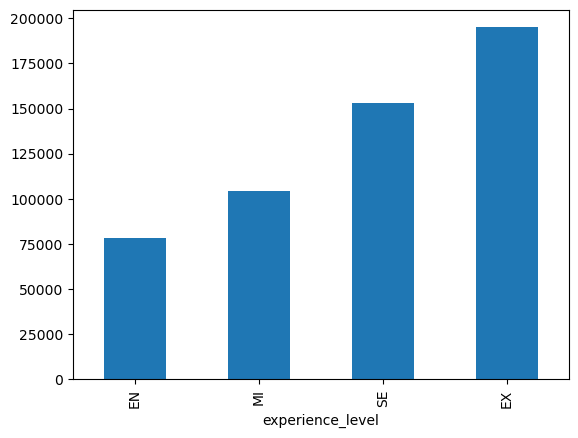

In [49]:
print('Salaries among experience levels')
print('EN = Entry level')
print('MI = Mid-level')
print('SN = Senior')
print('EX = Executive')
df.groupby('experience_level')['salary_in_usd'].mean().sort_values().plot.bar()

In [50]:
print('Salaries among experience levels')
df.groupby('experience_level')['salary_in_usd'].describe()

Salaries among experience levels


count           mean           std      min       25%  \
experience_level                                                           
EN                 320.0   78546.284375  52225.424309   5409.0   40000.0   
EX                 114.0  194930.929825  70661.929661  15000.0  145000.0   
MI                 805.0  104525.939130  54387.685128   5132.0   66837.0   
SE                2516.0  153051.071542  56896.263954   8000.0  115000.0   

                       50%        75%       max  
experience_level                                 
EN                 70000.0  110009.25  300000.0  
EX                196000.0  239000.00  416000.0  
MI                100000.0  135000.00  450000.0  
SE                146000.0  185900.00  423834.0

## Examine by year

In [51]:
exp_yr = df.set_index(['experience_level', 'work_year']).groupby([ 'experience_level' , 'work_year'])
exp_yr.describe()

salary                                         \
                             count           mean           std       min   
experience_level work_year                                                  
EN               2020         23.0  381747.826087  9.306964e+05   10000.0   
                 2021         55.0  280286.836364  5.645960e+05    8760.0   
                 2022        124.0  164882.241935  6.189730e+05    6000.0   
                 2023        118.0  132547.483051  1.879418e+05    7000.0   
EX               2020          3.0  136666.666667  1.654035e+05   15000.0   
                 2021         10.0  178500.000000  1.062829e+05   59000.0   
                 2022         41.0  335831.097561  9.085521e+05   80000.0   
                 2023         60.0  202856.266667  6.624455e+04  100000.0   
MI               2020         32.0  533231.531250  1.979802e+06    8000.0   
                 2021         92.0  807001.684783  3.512441e+06   12000.0   
                 2022        361.0  162050.800554  3.697761e+05    7500.0   
                 2023        320.0  156229.200000  3.274808e+05   25500.0   
SE               2020         18.0  172733.333333  1.635209e+05   40000.0   
                 2021         73.0  461816.671233  1.196843e+06   24000.0   
                 2022       1138.0  160409.279438  2.716776e+05    8000.0   
                 2023       1287.0  161985.718726  7.894008e+04   35000.0   

                                                                       \
                                  25%       50%       75%         max   
experience_level work_year                                              
EN               2020        42600.00   72000.0  275000.0   4450000.0   
                 2021        46000.00   72500.0  100000.0   2250000.0   
                 2022        40000.00   66750.0  125101.0   6600000.0   
                 2023        65000.00   92700.0  133940.0   1400000.0   
EX               2020        42500.00   70000.0  197500.0    325000.0   
                 2021       112500.00  140000.0  233750.0    416000.0   
                 2022       157000.00  200000.0  239000.0   6000000.0   
                 2023       145000.00  200000.0  239000.0    353200.0   
MI               2020        54249.75   87500.0  115750.0  11000000.0   
                 2021        52875.00   93075.0  153250.0  30400000.0   
                 2022        70000.00  100000.0  140000.0   4200000.0   
                 2023        80000.00  113546.0  150000.0   5000000.0   
SE               2020        81250.00  127500.0  189500.0    720000.0   
                 2021        82500.00  150000.0  185000.0   7000000.0   
                 2022       112925.00  142200.0  185875.0   7500000.0   
                 2023       120000.00  150000.0  191765.0   1500000.0   

                           salary_in_usd                 ...            \
                                   count           mean  ...       75%   
experience_level work_year                               ...             
EN               2020               23.0   57511.608696  ...   71000.0   
                 2021               55.0   54905.254545  ...   80000.0   
                 2022              124.0   77006.024194  ...  111250.0   
                 2023              118.0   95283.966102  ...  128750.0   
EX               2020                3.0  139944.333333  ...  202416.5   
                 2021               10.0  186128.000000  ...  233750.0   
                 2022               41.0  188260.292683  ...  222640.0   
                 2023               60.0  203705.683333  ...  239000.0   
MI               2020               32.0   87564.718750  ...  107000.0   
                 2021               92.0   82116.934783  ...  110000.0   
                 2022              361.0  101305.598338  ...  130000.0   
                 2023              320.0  116297.596875  ...  149600.0   
SE               2020               18.0  137240.500000  ...  1785

In [52]:
exp_yr['salary_in_usd'].mean()

experience_level  work_year
EN                2020          57511.608696
                  2021          54905.254545
                  2022          77006.024194
                  2023          95283.966102
EX                2020         139944.333333
                  2021         186128.000000
                  2022         188260.292683
                  2023         203705.683333
MI                2020          87564.718750
                  2021          82116.934783
                  2022         101305.598338
                  2023         116297.596875
SE                2020         137240.500000
                  2021         126085.356164
                  2022         147659.688049
                  2023         159568.928516
Name: salary_in_usd, dtype: float64

<AxesSubplot: xlabel='experience_level,work_year'>

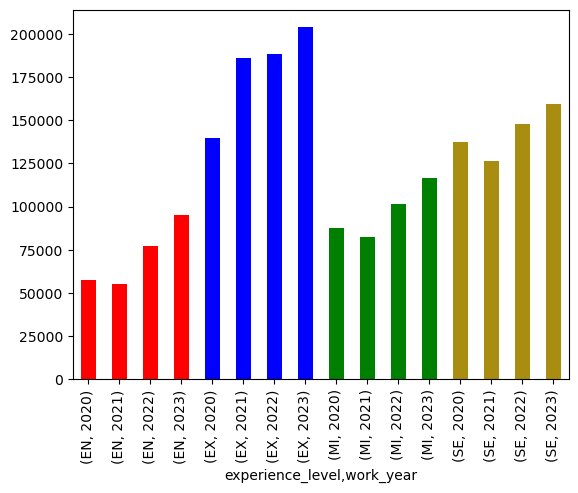

In [53]:
exp_yr['salary_in_usd'].mean().plot.bar(color=four_cat_color+['#a98d10']*4)

Isn't that interesting? Executive/director positions got a __SUBSTANTIAL__ salary bump and every other position got a salary cut during covid

In [54]:
exp_yr.describe()

salary                                         \
                             count           mean           std       min   
experience_level work_year                                                  
EN               2020         23.0  381747.826087  9.306964e+05   10000.0   
                 2021         55.0  280286.836364  5.645960e+05    8760.0   
                 2022        124.0  164882.241935  6.189730e+05    6000.0   
                 2023        118.0  132547.483051  1.879418e+05    7000.0   
EX               2020          3.0  136666.666667  1.654035e+05   15000.0   
                 2021         10.0  178500.000000  1.062829e+05   59000.0   
                 2022         41.0  335831.097561  9.085521e+05   80000.0   
                 2023         60.0  202856.266667  6.624455e+04  100000.0   
MI               2020         32.0  533231.531250  1.979802e+06    8000.0   
                 2021         92.0  807001.684783  3.512441e+06   12000.0   
                 2022        361.0  162050.800554  3.697761e+05    7500.0   
                 2023        320.0  156229.200000  3.274808e+05   25500.0   
SE               2020         18.0  172733.333333  1.635209e+05   40000.0   
                 2021         73.0  461816.671233  1.196843e+06   24000.0   
                 2022       1138.0  160409.279438  2.716776e+05    8000.0   
                 2023       1287.0  161985.718726  7.894008e+04   35000.0   

                                                                       \
                                  25%       50%       75%         max   
experience_level work_year                                              
EN               2020        42600.00   72000.0  275000.0   4450000.0   
                 2021        46000.00   72500.0  100000.0   2250000.0   
                 2022        40000.00   66750.0  125101.0   6600000.0   
                 2023        65000.00   92700.0  133940.0   1400000.0   
EX               2020        42500.00   70000.0  197500.0    325000.0   
                 2021       112500.00  140000.0  233750.0    416000.0   
                 2022       157000.00  200000.0  239000.0   6000000.0   
                 2023       145000.00  200000.0  239000.0    353200.0   
MI               2020        54249.75   87500.0  115750.0  11000000.0   
                 2021        52875.00   93075.0  153250.0  30400000.0   
                 2022        70000.00  100000.0  140000.0   4200000.0   
                 2023        80000.00  113546.0  150000.0   5000000.0   
SE               2020        81250.00  127500.0  189500.0    720000.0   
                 2021        82500.00  150000.0  185000.0   7000000.0   
                 2022       112925.00  142200.0  185875.0   7500000.0   
                 2023       120000.00  150000.0  191765.0   1500000.0   

                           salary_in_usd                 ...            \
                                   count           mean  ...       75%   
experience_level work_year                               ...             
EN               2020               23.0   57511.608696  ...   71000.0   
                 2021               55.0   54905.254545  ...   80000.0   
                 2022              124.0   77006.024194  ...  111250.0   
                 2023              118.0   95283.966102  ...  128750.0   
EX               2020                3.0  139944.333333  ...  202416.5   
                 2021               10.0  186128.000000  ...  233750.0   
                 2022               41.0  188260.292683  ...  222640.0   
                 2023               60.0  203705.683333  ...  239000.0   
MI               2020               32.0   87564.718750  ...  107000.0   
                 2021               92.0   82116.934783  ...  110000.0   
                 2022              361.0  101305.598338  ...  130000.0   
                 2023              320.0  116297.596875  ...  149600.0   
SE               2020               18.0  137240.500000  ...  1785

# Examine Experience Levels among Jobs

In [55]:
df

work_year experience_level employment_type  \
3705       2021               EN              FT   
3593       2020               EN              FT   
1548       2022               EN              FT   
573        2023               EN              FT   
3494       2021               MI              FT   
...         ...              ...             ...   
649        2023               SE              FT   
3468       2022               SE              FT   
3463       2022               SE              FT   
3750       2020               SE              FT   
3675       2021               EX              CT   

                          job_title  salary salary_currency  salary_in_usd  \
3705              Big Data Engineer  435000             INR           5882   
3593                   Data Analyst  450000             INR           6072   
1548                   AI Developer    6000             EUR           6304   
573   Autonomous Vehicle Technician    7000             USD           7000   
3494                 Data Scientist  700000             INR           9466   
...                             ...     ...             ...            ...   
649                  Data Architect  376080             USD         376080   
3468         Applied Data Scientist  380000             USD         380000   
3463            Data Analytics Lead  405000             USD         405000   
3750                 Data Scientist  412000             USD         412000   
3675       Principal Data Scientist  416000             USD         416000   

     employee_residence  remote_ratio company_location company_size  
3705                 IN             0               CH            L  
3593                 IN             0               IN            S  
1548                 MK             0               MK            S  
573                  GH             0               GH            S  
3494                 IN             0               IN            S  
...                 ...           ...              ...          ...  
649                  US           100               US            M  
3468                 US           100               US            L  
3463                 US           100               US            L  
3750                 US           100               US            L  
3675                 US           100               US            S  

[3755 rows x 11 columns]

# Distribution of all job titles

<AxesSubplot: ylabel='count'>

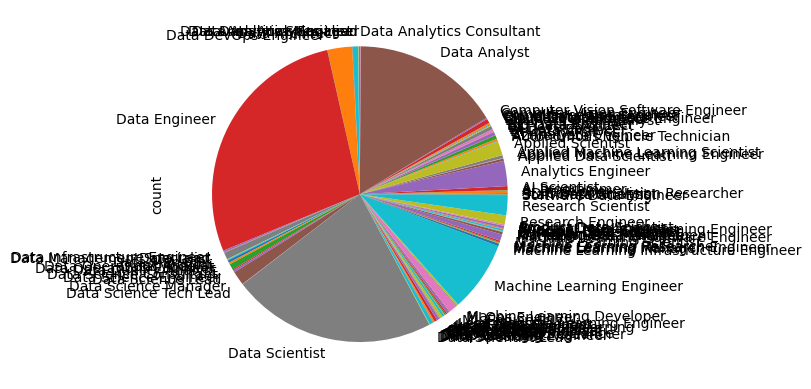

In [56]:
df.groupby('job_title').describe()['salary']['count'].plot.pie()

a better way to do this?

<AxesSubplot: ylabel='job_title'>

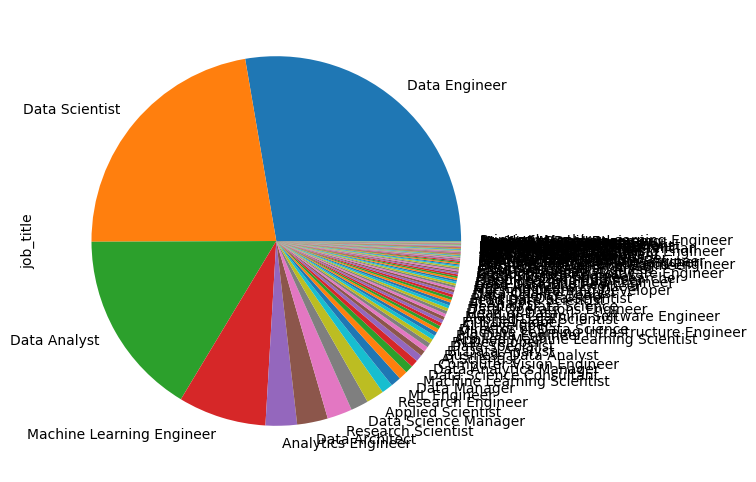

In [57]:
df['job_title'].value_counts().plot(kind='pie', figsize=(6,6))

# Looking at the corr_matrix

In [58]:
df.corr()

/tmp/ipykernel_1400/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.094724       0.228290     -0.236430
salary         -0.094724  1.000000      -0.023676      0.028731
salary_in_usd   0.228290 -0.023676       1.000000     -0.064171
remote_ratio   -0.236430  0.028731      -0.064171      1.000000

In [59]:
df.loc[( df.work_year == 2020  )| ( df.work_year == 2021 )]

work_year experience_level employment_type                 job_title  \
3705       2021               EN              FT         Big Data Engineer   
3593       2020               EN              FT              Data Analyst   
3494       2021               MI              FT            Data Scientist   
3597       2021               MI              FT             Data Engineer   
3703       2021               MI              FT            Data Scientist   
...         ...              ...             ...                       ...   
3615       2021               SE              FT               ML Engineer   
3538       2021               MI              CT               ML Engineer   
3697       2020               EX              FT  Director of Data Science   
3750       2020               SE              FT            Data Scientist   
3675       2021               EX              CT  Principal Data Scientist   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
3705  435000             INR           5882                 IN             0   
3593  450000             INR           6072                 IN             0   
3494  700000             INR           9466                 IN             0   
3597  108000             TRY          12103                 TR             0   
3703   69600             BRL          12901                 BR             0   
...      ...             ...            ...                ...           ...   
3615  256000             USD         256000                 US           100   
3538  270000             USD         270000                 US           100   
3697  325000             USD         325000                 US           100   
3750  412000             USD         412000                 US           100   
3675  416000             USD         416000                 US           100   

     company_location company_size  
3705               CH            L  
3593               IN            S  
3494               IN            S  
3597               TR            M  
3703               BR            S  
...               ...          ...  
3615               US            S  
3538               US            L  
3697               US            L  
3750               US            L  
3675               US            S  

[306 rows x 11 columns]

In [60]:
wfh0 = df.loc[(df.salary_currency == 'USD') & (( df.remote_ratio == 0 ))]
wfh50 = df.loc[(df.salary_currency == 'USD') & (( df.remote_ratio == 50 ))]
wfh100 = df.loc[(df.salary_currency == 'USD') & (( df.remote_ratio == 100 ))]

In [61]:
salary_wfh0 = wfh0.drop(['salary_currency', 'salary_in_usd'], axis=1).salary
salary_wfh50 = wfh50.drop(['salary_currency', 'salary_in_usd'], axis=1).salary
salary_wfh100 = wfh100.drop(['salary_currency', 'salary_in_usd'], axis=1).salary

In [66]:
pvalue = spy.stats.f_oneway(salary_wfh0, salary_wfh50, salary_wfh100)[1]
print(f'{pvalue = }')
print(f'data sets are statistically different? = { pvalue < 0.05}')

pvalue = 2.2431471781169775e-08
data sets are statistically different? = True


if `p-value <0.05` then the two data sets are statistically different  
if `p-value >0.05` then the two data sets are not statistically different


<AxesSubplot: title={'center': 'Non-US Companies'}, ylabel='count'>

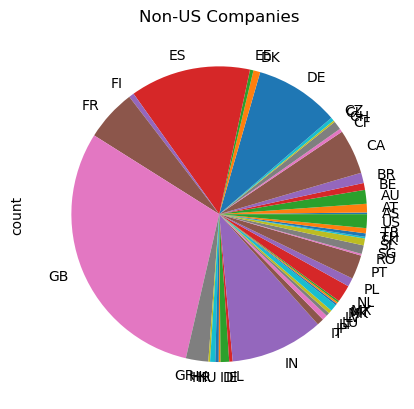

In [63]:
plt.title('Non-US Companies')
df.loc[(df.salary_currency != 'USD')].groupby('company_location').describe()['work_year']['count'].plot.pie()